In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
dfTaxiBikes = pd.read_csv('aux/datasets/taxi-bikes_v1.csv', parse_dates = ['Date'])

In [3]:
# Changing columns names:
dfTaxiBikes.columns = ['date', 'distance', 'total_time']; dfTaxiBikes.head()

,date,distance,total_time
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [4]:
# Setting the column "date" as index:
dfTaxiBikes.set_index('date', inplace = True); dfTaxiBikes.head()

,distance,total_time
date,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [5]:
def getTimeInSecs(time):
    if time is np.nan:
        return np.nan
    
    hours, minutes, seconds = str(time).split(':')
    
    seconds = int(seconds) + (int(minutes) * 60) + (int(hours) * 60 * 60)
    
    return seconds

In [6]:
# Creating the column "seconds":
dfTaxiBikes['seconds'] = dfTaxiBikes['total_time'].map(getTimeInSecs); dfTaxiBikes.head(10)

,distance,total_time,seconds
date,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,00:28:37,1717.0
2015-08-11,1.67,00:13:07,787.0


In [7]:
# Creating the column "minutes":
dfTaxiBikes['minutes'] = dfTaxiBikes['seconds'].map(lambda x: x / 60); dfTaxiBikes.head(10)

,distance,total_time,seconds,minutes
date,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN
2015-08-10,3.36,00:28:37,1717.0,28.616667
2015-08-11,1.67,00:13:07,787.0,13.116667


In [8]:
# Rearranging columns:
columnsOrder = dfTaxiBikes.columns.tolist()
columnsOrder = columnsOrder[:2] + columnsOrder[:1:-1];
columnsOrder

['distance', 'total_time', 'minutes', 'seconds']

In [9]:
dfTaxiBikes = dfTaxiBikes[columnsOrder]; dfTaxiBikes.head(10)

,distance,total_time,minutes,seconds
date,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN
2015-08-10,3.36,00:28:37,28.616667,1717.0
2015-08-11,1.67,00:13:07,13.116667,787.0


In [10]:
# Filling NaN values and describing:
dfTaxiBikes.fillna(0).describe()

,distance,minutes,seconds
count,81.000000,81.000000,81.000000
mean,3.137531,20.348354,1220.901235
std,3.634519,37.345950,2240.756985
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,9.550000,573.000000
75%,3.050000,23.766667,1426.000000
max,26.200000,260.716667,15643.000000


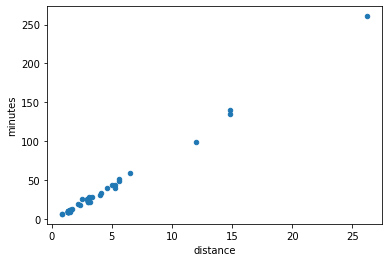

In [11]:
# Ploting the correlation between distance and minutes:
dfTaxiBikes.plot(x = 'distance', y = 'minutes', kind = 'scatter');

In [12]:
# Checking the correlations:

In [13]:
dfTaxiBikes.corr()

,distance,minutes,seconds
distance,1.000000,0.997203,0.997203
minutes,0.997203,1.000000,1.000000
seconds,0.997203,1.000000,1.000000


In [14]:
dfTaxiBikes.corr(method = 'spearman')

,distance,minutes,seconds
distance,1.00000,0.96482,0.96482
minutes,0.96482,1.00000,1.00000
seconds,0.96482,1.00000,1.00000


In [15]:
dfTaxiBikes.corr(method = 'kendall')

,distance,minutes,seconds
distance,1.00000,0.88305,0.88305
minutes,0.88305,1.00000,1.00000
seconds,0.88305,1.00000,1.00000


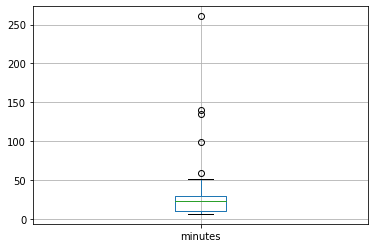

In [16]:
# Checking for minutes outliers:
dfTaxiBikes.boxplot('minutes', return_type = 'axes');

In [17]:
# Creating the column "km_per_minutes":
dfTaxiBikes['km_per_minutes'] = dfTaxiBikes['distance'] / dfTaxiBikes['minutes']
dfTaxiBikes.fillna(0).head(10)

,distance,total_time,minutes,seconds,km_per_minutes
date,,,,,
2015-08-02,1.70,0,0.000000,0.0,0.000000
2015-08-03,1.40,0,0.000000,0.0,0.000000
2015-08-04,2.10,0,0.000000,0.0,0.000000
2015-08-06,2.38,0,0.000000,0.0,0.000000
2015-08-07,2.30,0,0.000000,0.0,0.000000
2015-08-08,3.40,0,0.000000,0.0,0.000000
2015-08-09,2.50,0,0.000000,0.0,0.000000
2015-08-10,3.36,00:28:37,28.616667,1717.0,0.117414
2015-08-11,1.67,00:13:07,13.116667,787.0,0.127319


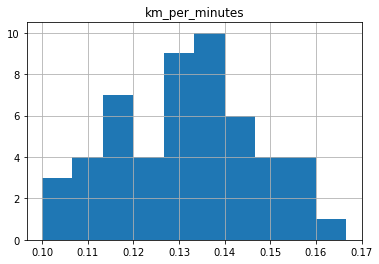

In [18]:
dfTaxiBikes.hist('km_per_minutes');

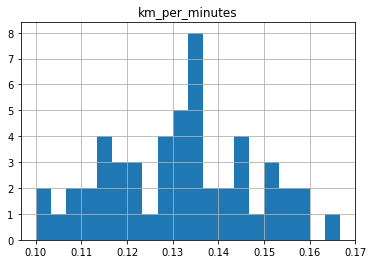

In [19]:
dfTaxiBikes.hist('km_per_minutes', bins = 20);

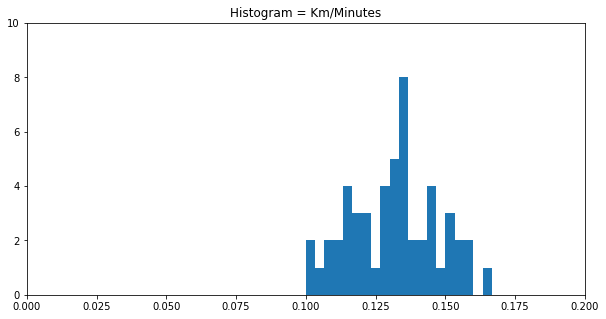

In [20]:
# Creating and saving a histogram:
dfTaxiBikes.hist('km_per_minutes', bins = 20, figsize = (10, 5))
plt.xlim((0.0, 0.2))
plt.ylim((0, 10))
plt.title('Histogram = Km/Minutes')
plt.grid(False)

plt.savefig('aux/images/histogram.png')

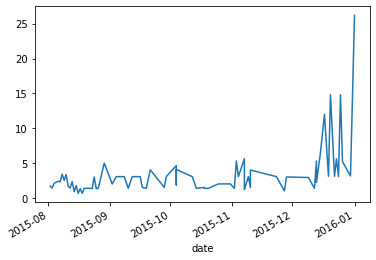

In [21]:
# Ploting just the distance:
dfTaxiBikes['distance'].plot();

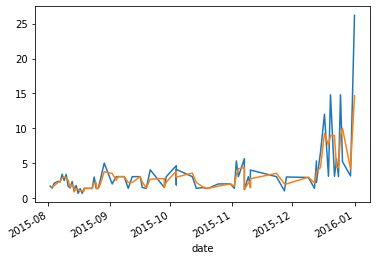

In [22]:
# Ploting the distance with its average in a 2 hour window:
dfTaxiBikes['distance'].plot()
pd.Series(dfTaxiBikes['distance']).rolling(window = 2).mean().plot();

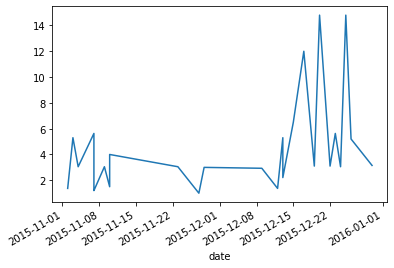

In [23]:
# Ploting the distance from November/December 2015:
dfTaxiBikes['2015-11':'2015-12']['distance'].plot();

In [24]:
# Locate a specific date and getting its data:
dfTaxiBikes.loc['2015-12-25']

distance              14.8
total_time        02:20:00
minutes                140
seconds               8400
km_per_minutes    0.105714
Name: 2015-12-25 00:00:00, dtype: object

In [25]:
# Saving the results:
dfTaxiBikes.to_csv('aux/datasets/taxi-bikes_v2.csv')

In [26]:
# Reseting the indexes:
dfTaxiBikes.reset_index()

,date,distance,total_time,minutes,seconds,km_per_minutes
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,00:25:08,25.133333,1508.0,0.121353
77,2015-12-25,14.80,02:20:00,140.000000,8400.0,0.105714
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,00:22:10,22.166667,1330.0,0.142105
